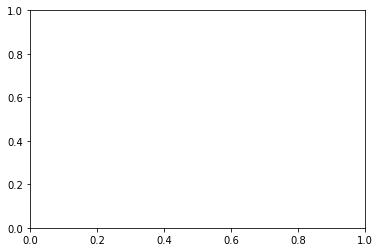

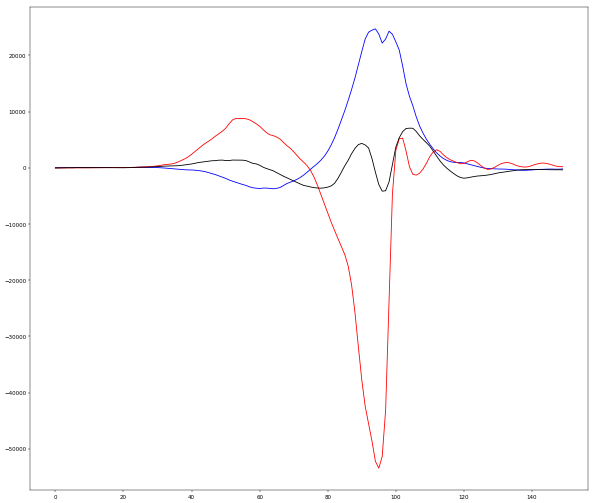

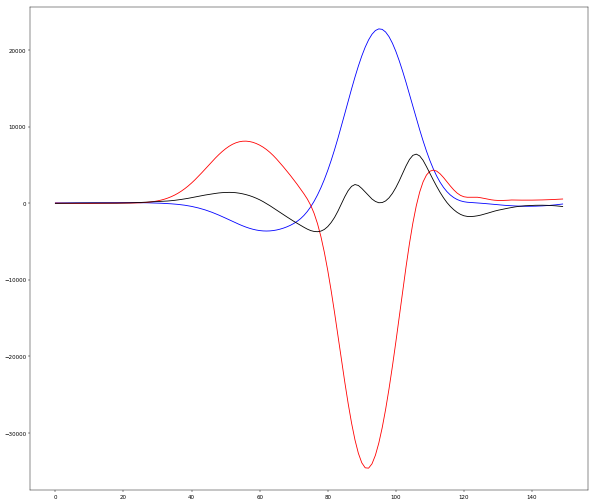

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

col_names = ['timestamp', 'X', 'Y', 'Z']
gyro_data_reference = pd.read_csv('./reference-fd-bw/gyro.csv', names=col_names)

TMP_START = 0
TMP_END = 150

xaxis = list(range(len(gyro_data_reference)))[TMP_START:TMP_END]
x_reference = gyro_data_reference['X'][TMP_START:TMP_END]
# x_alt = savitzky_golay(list(x_reference), 31, 2)
y_reference = gyro_data_reference['Y'][TMP_START:TMP_END]
z_reference = gyro_data_reference['Z'][TMP_START:TMP_END]
fig = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_reference), color="blue", label="xaxis")
plt.plot(xaxis, np.rad2deg(y_reference), color="red", label="yaxis")
plt.plot(xaxis, np.rad2deg(z_reference), color="black", label="zaxis")
plt.show()


# reference data filtration
x_reference = savgol_filter(list(x_reference), 21, 2)
x_reference = savgol_filter(list(x_reference), 31, 2)
y_reference = savgol_filter(list(y_reference), 21, 2)
y_reference = savgol_filter(list(y_reference), 31, 2)
# z_reference = savitzky_golay(list(z_reference), 11, 2)
z_reference = savgol_filter(list(z_reference), 21, 2)

fig2 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_reference), color="blue", label="xaxis")
plt.plot(xaxis, np.rad2deg(y_reference), color="red", label="yaxis")
plt.plot(xaxis, np.rad2deg(z_reference), color="black", label="zaxis")
plt.show()
plt.legend()



In [10]:

TMP_START = 0
TMP_END = 150

gyro_data_forward = pd.read_csv('./amg-forward/gyro.csv', names=col_names)
xaxis = list(range(len(gyro_data_forward)))[TMP_START:TMP_END]

x_normal = gyro_data_forward['X'][TMP_START:TMP_END]
y_normal = gyro_data_forward['Y'][TMP_START:TMP_END]
z_normal = gyro_data_forward['Z'][TMP_START:TMP_END]

# forward data normalization
x_normal = savgol_filter(list(x_normal), 21, 2)
x_normal = savgol_filter(list(x_normal), 51, 2)
y_normal = savgol_filter(list(y_normal), 31, 2)
y_normal = savgol_filter(list(y_normal), 51, 2)
z_normal = savgol_filter(list(z_normal), 11, 2)
z_normal = savgol_filter(list(z_normal), 21, 2)


fig = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_normal), color="blue", label="data")
plt.plot(xaxis, np.rad2deg(x_reference), color="red", label="schema")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
fig2 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(y_normal), color="blue", label="data")
plt.plot(xaxis, np.rad2deg(y_reference), color="red", label="schema")
# plt.plot(xaxis, np.rad2deg(z_normal), color="black", label="zaxis")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
fig3 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(z_normal), color="blue", label="data")
plt.plot(xaxis, np.rad2deg(z_reference), color="red", label="schema")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


0      -0.243902
1      -0.548781
2      -0.182927
3      -0.487805
4      -0.853659
5      -0.731707
6      -0.609756
7      -0.609756
8      -0.121951
9       0.487805
10      0.975610
11      1.829268
12      3.353659
13      5.243903
14      7.195122
15      8.963415
16     10.426829
17     11.341464
18     12.073171
19     12.439025
20     11.707317
21     10.304878
22      7.256098
23      5.000000
24      3.963415
25      1.585366
26     -3.109756
27     -8.658537
28    -13.963415
29    -23.048780
         ...    
120   -73.719513
121   -76.402443
122   -79.207321
123   -81.524391
124   -83.292686
125   -85.000000
126   -86.646347
127   -87.378052
128   -86.890244
129   -85.487808
130   -82.500000
131   -76.280487
132   -68.841469
133   -63.109756
134   -58.902439
135   -54.207317
136   -46.280487
137   -34.207317
138   -23.536587
139   -22.500000
140   -25.914635
141   -25.914635
142   -21.707317
143   -15.731708
144   -10.304878
145    -7.439024
146    -8.780488
147   -13.2317

TypeError: unsupported operand type(s) for -: 'list' and 'float'

In [27]:
%pylab inline
from dtw import dtw
# DTW for Z acc
x_normal = gyro_data_forward['X']
# y_normal = gyro_data_forward['Y'][TMP_START:TMP_END]
# z_normal = gyro_data_forward['Z'][TMP_START:TMP_END]
x_normal = savgol_filter(list(x_normal), 21, 2)
x_normal = savgol_filter(list(x_normal), 51, 2)

k = x_normal[150:300]
n = x_reference

dtw_x_data = []
dtw_dict_data = {}
# this simple for loop calculates the similarities between reference model
# and given time-window (ie. from 100 to 250)
for it in range(0, 3000):
    k = x_normal[it:it+150]
    dist, cost, *_ = dtw(k, n, dist=lambda k, n: norm(k - n))
    dtw_x_data.append(mean(cost))
    # dtw_dict_data[mean(cost)] = it

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


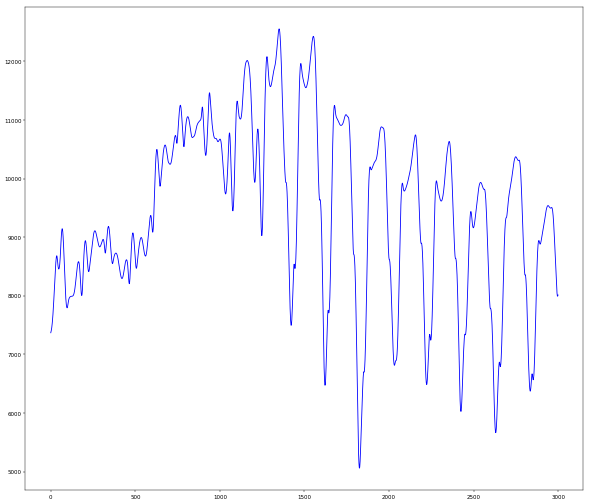

In [28]:
# Plot showing where local minimums are (these are the indexes we are
# searching for). Roughly every 150 indexes there should occur next minimum.
xaxis = list(range(len(dtw_x_data)))
fig3 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(dtw_x_data), color="blue", label="data")


In [26]:
minima_indexes = []
# minima_dict_indices = []
print(len(dtw_x_data))
step = 5
for it in range(0, len(dtw_x_data), step):
    val = min(dtw_x_data[it:it+step])
    # minima_dict_indices.append(dtw_dict_data[val])
    minima_indexes.append(dtw_x_data.index(val))
    
    
print(minima_indexes)
# print(minima_dict_indices)


150
[0, 5, 11, 18, 21, 25, 30, 35, 42, 46, 54, 56, 62, 69, 71, 79, 81, 89, 91, 95, 102, 109, 111, 119, 121, 129, 132, 135, 142, 149]


In [ ]:
# regresja logistyczna
# rotation matrix -> dtw?